# Assignment 1

### Table of contents

    Importing libraries
    Particle class
    Collision class
    Model 
    Task 1
    Task 2 
    Task 3 
    Task 4

In [1]:
import matplotlib.pyplot as plt
from system_class import*
from particle_classes import*
from matplotlib.patches import Rectangle

##### Functions

In [2]:

def evolution(system_1,times=1):
    x_list = []
    y_list = []
    vx_list = []
    vy_list = []
    for i in range(4):
        x = []
        y = []
        vx = []
        vy = []
        for p in system_1.particles:  
            x.append(p.position.x)
            y.append(p.position.y)
            vx.append(p.velocity.vx)
            vy.append(p.velocity.vy)

        x_list.append(x)
        y_list.append(y)
        vx_list.append(vx)
        vy_list.append(vy)

        for time in range(times):
            system_1.update()
    return x_list,y_list,vx_list,vy_list

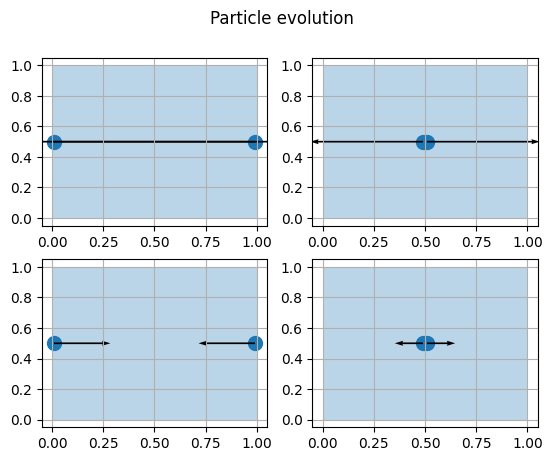

In [3]:
num_particles = 2
elasticity= 0.5
x_boundaries = 1
y_boundaries = 1
mean_velocity = 0.5
mass=[1]
radius=[.001]
tc = 0.000001

system_1 = system(num_particles, elasticity,x_boundaries, y_boundaries,mean_velocity,mass,radius, tc)

p1 = particle(position(0.01,0.5), velocity(1,0), 0.01, 1)
p2 = particle(position(0.99,0.5), velocity(-1,0), 0.01, 1)

system_1.particles.append(p1)
system_1.particles.append(p2)
for p in system_1.particles: 
    system_1.find_collisions_particle(p)

x_list,y_list,vx_list,vy_list = evolution(system_1,1)
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2)
fig.suptitle('Particle evolution')

r =100

ax1.scatter(x_list[0], y_list[0], s =r )
ax1.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))
ax1.quiver(x_list[0], y_list[0], vx_list[0], vy_list[0], scale=1)
ax1.grid()

ax2.scatter(x_list[1], y_list[1],s =r)
ax2.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))
ax2.quiver(x_list[1], y_list[1], vx_list[1], vy_list[1], scale=1)
ax2.grid()

ax3.scatter(x_list[2], y_list[2],s =r)
ax3.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))
ax3.quiver(x_list[2], y_list[2], vx_list[2], vy_list[2], scale=1)
ax3.grid()

ax4.scatter(x_list[3], y_list[3],s =r)
ax4.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))
ax4.quiver(x_list[3], y_list[3], vx_list[3], vy_list[3], scale=1)
ax4.grid()

plt.show()

##### Making a histogram of the initia speeds

In [4]:
num_particles =1000
elasticity= 0.5
x_boundaries = 1
y_boundaries = 1
mean_velocity = 1 #m/s
mu = 1
mass=[1]
radius=[.001]
tc = 0

system_1 = system(num_particles, elasticity,x_boundaries, y_boundaries,mean_velocity,mass,radius, tc)
system_1.uniform_particles()

count = 0
for p in system_1.particles: 
    system_1.find_collisions_particle(p)
    count +=1


IndexError: invalid index to scalar variable.

In [ ]:
vel_start = np.zeros(num_particles)
i = 0
for p in system_1.particles:
    vel_start[i] = np.sqrt(p.velocity.vx**2 + p.velocity.vy**2)
    i+=1

In [5]:
times = 1000
count = 0 
for time in range(times): 
    count +=1
    system_1.update()

In [6]:
vel_end = np.zeros(num_particles)
i = 0
for p in system_1.particles:
    vel_end[i] = np.sqrt(p
    .velocity.vx**2 + p.velocity.vy**2)
    i+=1

In [7]:
T = 1
m = 1
v = np.linspace(0,mean_velocity*2,100)
k = 0.1
                  
def boltsmann(m,v,k,T):
    return m*v/k / T * np.exp(- m* v**2 / 2 / k / T)

vel_boltsmann = boltsmann(m,v,k,T)


Text(0.5, 1.0, 'Plot of the Boltsmanns Distribution')

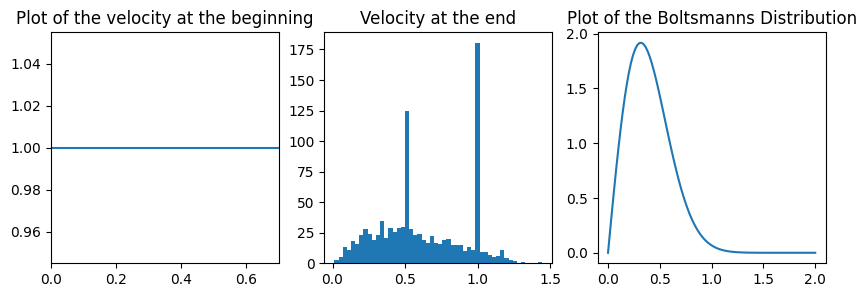

In [8]:
f,(ax1, ax2, ax3) = plt.subplots(1,3, figsize = (10,3))
ax1.plot(vel_start)
ax1.set_xlim(0,0.7)
ax1.set_title("Plot of the velocity at the beginning")

ax2.hist(vel_end, bins = 50)
ax2.set_title("Velocity at the end")

ax3.plot(v,vel_boltsmann)
ax3.set_title("Plot of the Boltsmanns Distribution")

**Task 1**
In this task the speed distribution of a gas of hard disks will be investigated.

The conditions set are: 

    4000 particles 
        positions: random uniform distribution within box [0,1][0,1]
        velocities: random uniform distribution, v = [v0 cosθ,v0 sinθ], v0 = 1, and 0 = [1, 2π]
        mass: 1
    Elastic conditions: ξ =1 

In the three histograms below we see the initial speed distribution, the speed distribution after the system has reached equilibrium and the D Maxwell-Boltzmann distribution.
    
    p(v) = mv kT exp−mv2 2kT




In [9]:
num_particles =1000
elasticity= 0.5
x_boundaries = 1
y_boundaries = 1
mean_velocity = 1 #m/s
mu = 1
mass=[1, 4]
radius=[.001]
tc = 0

system_2 = system(num_particles, elasticity,x_boundaries, y_boundaries,mean_velocity,mass,radius, tc)
system_2.uniform_particles()

for p in system_2.particles: system_2.find_collisions_particle(p)


In [10]:
vel_start_m0 = np.zeros(int(system_2.num_particles/2))
for i in range(int(system_2.num_particles/2)):
    p = system_2.particles[i]
    vel_start_m0[i] = np.sqrt(p.velocity.vx**2 + p.velocity.vy**2)

vel_start_4m0 = np.zeros(int(system_2.num_particles/2))
for i in range(int(system_2.num_particles/2)):
    p = system_2.particles[int(system_2.num_particles/2) + i-1]
    vel_start_4m0[i] = np.sqrt(p.velocity.vx**2 + p.velocity.vy**2)

In [11]:
times = 1000
for time in range(times): system_2.update()

In [12]:
vel_end_m0 = np.zeros(int(system_2.num_particles/2))
for i in range(int(system_2.num_particles/2)):
    p = system_2.particles[i]
    vel_end_m0[i] = np.sqrt(p.velocity.vx**2 + p.velocity.vy**2)

vel_end_4m0 = np.zeros(int(system_2.num_particles/2))
for i in range(int(system_2.num_particles/2)):
    p = system_2.particles[int(system_2.num_particles/2) + i-1]
    vel_end_4m0[i] = np.sqrt(p.velocity.vx**2 + p.velocity.vy**2)

Text(0.5, 1.0, 'Plot of the Boltsmanns Distribution')

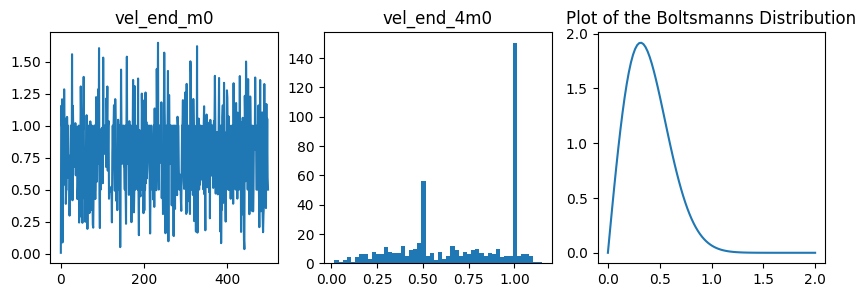

In [13]:
f,(ax1, ax2, ax3) = plt.subplots(1,3, figsize = (10,3))
ax1.plot(vel_end_m0)
ax1.set_title("vel_end_m0")

ax2.hist(vel_end_4m0, bins = 50)
ax2.set_title("vel_end_4m0")

ax3.plot(v,vel_boltsmann)
ax3.set_title("Plot of the Boltsmanns Distribution")

In [14]:
def E(v,m):return m*v**2/2

d_collision = 0.001

num_particles =1000
elasticity= 1
x_boundaries = 1
y_boundaries = 1
mean_velocity = 1 #m/s
mu = 1
mass=[1, 4]
radius=[.001]
tc = 0
number_of_updates = 1000

system_3 = system(num_particles, elasticity,x_boundaries, y_boundaries,mean_velocity,mass,radius, tc)
system_3.uniform_particles()

for p in system_3.particles: system_3.find_collisions_particle(p)

vel_m0 = np.zeros((int(system_3.num_particles/2), number_of_updates))
vel_4m0 = np.zeros((int(system_3.num_particles/2),number_of_updates))

for i in range(int(system_3.num_particles/2)):
    p = system_3.particles[i]
    vel_m0[i,0] = np.sqrt(p.velocity.vx**2 + p.velocity.vy**2)

    p = system_3.particles[int(system_3.num_particles/2) + i-1]
    vel_4m0[i,0] = np.sqrt(p.velocity.vx**2 + p.velocity.vy**2)
    

In [15]:
average_current = system_3.average_particle_collision
average_next = average_current 
j = 1
while system_3.average_particle_collision < 10 and j < number_of_updates:
    while average_next-average_current < d_collision: 
        system_3.update()
        average_next = system_3.average_particle_collision
    average_current = average_next
    for i in range(int(system_3.num_particles/2)):
        p = system_3.particles[i]
        vel_m0[i,j] = np.sqrt(p.velocity.vx**2 + p.velocity.vy**2)
        p = system_3.particles[int(system_3.num_particles/2) + i-1]
        vel_4m0[i,j] = np.sqrt(p.velocity.vx**2 + p.velocity.vy**2)
    j +=1 

Text(0.5, 1.0, 'vel_4m0')

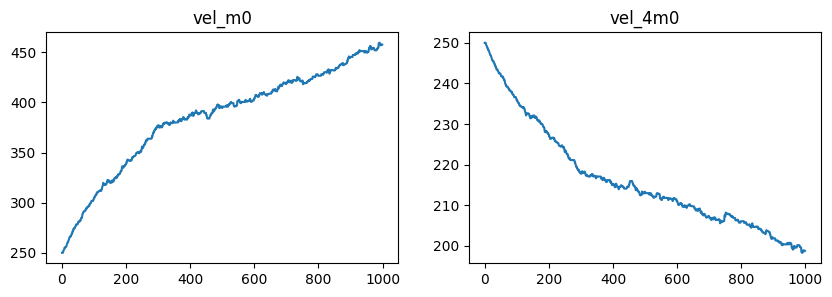

In [16]:
f,(ax1, ax2) = plt.subplots(1,2, figsize = (10,3))
ax1.plot(E(vel_m0,1).sum(axis = 0))
ax1.set_title("vel_m0")

ax2.plot(E(vel_4m0,1).sum(axis = 0))
ax2.set_title("vel_4m0")


Problem 4:

In [19]:
num_particles =400
elasticity= 0.5
x_boundaries = 1
y_boundaries = 1
mean_velocity = 0 #m/s
mu = 1
mass=[1]
radius=[.01]
tc = 0
number_of_updates = 1000

system_4 = system(num_particles, elasticity,x_boundaries, y_boundaries,mean_velocity,mass,radius, tc)
system_4.crater()

projectile = particle(position(0.5,0.75), velocity(0, -5), 100*radius[0], 25* mass[0])
system_4.particles.append(projectile)

for p in system_4.particles: system_4.find_collisions_particle(p)

In [23]:
x_list,y_list,vx_list,vy_list= evolution(system_4,100)

In [24]:
r_list = []
for p in system_4.particles: 
    r_list.append(p.radius)

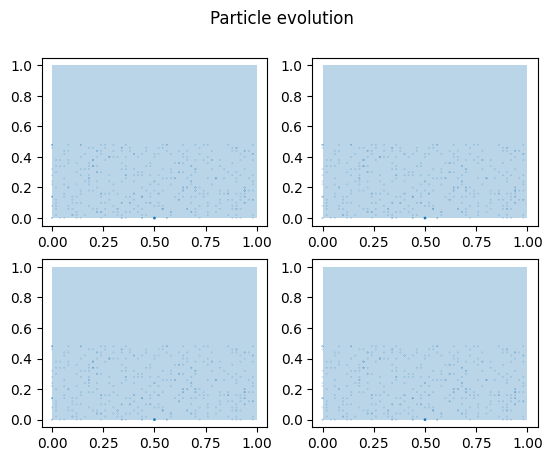

In [25]:

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2)
fig.suptitle('Particle evolution')

r_list = np.array(r_list)

ax1.scatter(x_list[0], y_list[0], s =r_list )
ax1.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))


ax2.scatter(x_list[1], y_list[1],s =r_list)
ax2.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))


ax3.scatter(x_list[2], y_list[2],s =r_list)
ax3.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))

ax4.scatter(x_list[3], y_list[3],s =r_list)
ax4.add_patch(Rectangle((0,0), 1, 1, angle=0.0, fill=True, alpha = 0.3))


plt.show()